# Análisis del Problema de Aplicación 

Los fármacos de moléculas pequeñas son cruciales para interactuar con proteínas celulares y modular sus funciones, a menudo dirigidos a inhibir proteínas involucradas en enfermedades. 

El conjunto de datos "Big Encoded Library for Chemical Assessment" (BELKA), creado por Leash Biosciences, contiene información sobre moléculas pequeñas y su capacidad para interactuar con tres proteínas objetivo, utilizando la tecnología de biblioteca química codificada por ADN (DEL).

Identificar estas moléculas a través de métodos tradicionales es un proceso laborioso por eso, el objetivo es utilizar técnicas de aprendizaje automático (ML) para predecir la afinidad de unión de compuestos químicos a proteínas, aprovechando los avances en ML para realizar búsquedas eficientes en el vasto espacio químico. Este concurso busca democratizar el descubrimiento computacional de fármacos y contribuir al desarrollo de nuevos tratamientos médicos.

La fuente de los datos es el concurso NeurIPS 2024 en Kaggle, titulado "Predict New Medicines with BELKA".

## Librerias 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
import dask.dataframe as dd
from sklearn.metrics import  RocCurveDisplay
from scipy.stats import chi2_contingency,chi2
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score, precision_score, recall_score,confusion_matrix

c:\Users\KELLY\miniconda3\envs\ml_venv\lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


Ahora accedemos a los datos almacenados en el archivo "train.csv" y almacenarlos en el DataFrame llamado 'medicinas'

In [2]:
medicinas = pd.read_csv("C:\\Users\\KELLY\\Downloads\\leash-BELKA\\train.csv")

También se ha cargado un archivo CSV llamado "test.csv" en un DataFrame llamado 'med_test'

In [10]:
med_test = pd.read_csv("C:\\Users\\KELLY\\Downloads\\leash-BELKA\\test.csv")

En este paso, se están concatenando dos conjuntos de datos, 'medicinas' y 'med_test', utilizando la función pd.concat(), lo que permite combinar ambos DataFrames en uno solo llamado 'completo'. Al final nos muestras las dimensiones del Dataframe que son 296921726 filas, con 7 columnas.

Explicación corta de cada variable:

- **id**: Identificador único para el par de moléculas y proteínas.
- **buildingblock1_smiles**: Estructura química del primer bloque en formato SMILES.
- **buildingblock2_smiles**: Estructura química del segundo bloque en formato SMILES.
- **buildingblock3_smiles**: Estructura química del tercer bloque en formato SMILES.
- **molecule_smiles**: Estructura de la molécula completa que incluye los tres bloques y un enlace de ADN representado por [Dy].
- **protein_name**: Nombre de la proteína diana.
- **binds**: Variable objetivo binaria que indica si la molécula se une a la proteína (1) o no (0).

# Descripción del Dataset original

## Datos de entrenamiento

Se mostrarán las caracteristicas de el Dataframe 'Medicinas' de emtrenamiento y primero visualizaremos las primeras 5 observaciones. Esto te permite visualizar un fragmento para entender su estructura y contenido inicial.

In [7]:
display(medicinas.head(6))

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds
0,0,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.Br.NCC1CCCN1c1cccnn1,C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H]...,BRD4,0
1,1,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.Br.NCC1CCCN1c1cccnn1,C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H]...,HSA,0
2,2,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.Br.NCC1CCCN1c1cccnn1,C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H]...,sEH,0
3,3,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.NCc1cccc(Br)n1,C#CCOc1ccc(CNc2nc(NCc3cccc(Br)n3)nc(N[C@@H](CC...,BRD4,0
4,4,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.NCc1cccc(Br)n1,C#CCOc1ccc(CNc2nc(NCc3cccc(Br)n3)nc(N[C@@H](CC...,HSA,0
5,5,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.NCc1cccc(Br)n1,C#CCOc1ccc(CNc2nc(NCc3cccc(Br)n3)nc(N[C@@H](CC...,sEH,0


A continuación se muestra la información concisa de la estructura del DataFrame, incluyendo el número de observaciones, el número de columnas, y el tipo de datos de cada columna. 

In [18]:
medicinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295246830 entries, 0 to 295246829
Data columns (total 7 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   id                     int64 
 1   buildingblock1_smiles  object
 2   buildingblock2_smiles  object
 3   buildingblock3_smiles  object
 4   molecule_smiles        object
 5   protein_name           object
 6   binds                  int64 
dtypes: int64(2), object(5)
memory usage: 15.4+ GB


El DataFrame completo contiene un total de 295,246,830 observaciones y 7 variables, las columnas **object** indican datos de texto o cadenas, mientras que las columnas **int64** son de tipo entero.

El DataFrame 'medicinas'(Train) consta de 295,246,830 observaciones y 7 columnas, presenta tanto datos numéricos como categóricos, y no se identificaron datos faltantes en el análisis preliminar. Debido a la gran cantidad de datos se planea encontrar una manera de disminuirna y quedarnos con un dataset final para el modelo

## Datos de prueba

El DataFrame 'med_test' contiene 1,674,896 filas y 6 columnas. 'med_test' no incluye la columna binds, que es una variable numérica utilizada para indicar la unión en el conjunto de entrenamiento.

In [19]:
display(med_test.head())

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name
0,295246830,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,C=Cc1ccc(N)cc1,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,BRD4
1,295246831,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,C=Cc1ccc(N)cc1,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,HSA
2,295246832,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,C=Cc1ccc(N)cc1,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,sEH
3,295246833,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC(O)Cn1cnc2c(N)ncnc21,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ncnc3c2...,BRD4
4,295246834,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC(O)Cn1cnc2c(N)ncnc21,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ncnc3c2...,HSA


In [27]:
med_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674896 entries, 0 to 1674895
Data columns (total 6 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   id                     1674896 non-null  int64 
 1   buildingblock1_smiles  1674896 non-null  object
 2   buildingblock2_smiles  1674896 non-null  object
 3   buildingblock3_smiles  1674896 non-null  object
 4   molecule_smiles        1674896 non-null  object
 5   protein_name           1674896 non-null  object
dtypes: int64(1), object(5)
memory usage: 76.7+ MB


El DataFrame completo contiene un total de 1,674,896 observaciones y 6 variables, todas las columnas contienen datos completos, sin valores nulos. El DataFrame 'med_test' es significativamente más pequeño en comparación con el de entrenamiento, que tiene un tamaño mucho mayor.

## Descriptiva para Variables Categóricas

Se contaran el número de ocurrencias de cada valor en la columna 'protein_name' del DataFrame 'medicinas'.

In [8]:
proteina = medicinas['protein_name'].value_counts()
print(proteina)

protein_name
BRD4    98415610
HSA     98415610
sEH     98415610
Name: count, dtype: int64


In [29]:
proteina_test = med_test['protein_name'].value_counts()
print(proteina_test)

protein_name
BRD4    558859
sEH     558142
HSA     557895
Name: count, dtype: int64


Los tres nombres de proteínas (BRD4, HSA, y sEH) tienen el mismo número de registros en cada Dataframe tanto el de entrenamiento 'medicinas' como el de prueba 'med_test'

In [9]:
bloke1 = medicinas['buildingblock1_smiles'].value_counts()
print(bloke1)

buildingblock1_smiles
O=C(N[C@H]1CC[C@@H](C(=O)O)C1)OCC1c2ccccc2-c2ccccc21     1090407
O=C(O)[C@H]1CCN1C(=O)OCC1c2ccccc2-c2ccccc21              1090380
O=C(N[C@@H]1CC[C@H](C(=O)O)C1)OCC1c2ccccc2-c2ccccc21     1090368
O=C(N[C@@H](CC1CC1)C(=O)O)OCC1c2ccccc2-c2ccccc21         1090362
O=C(O)C1CN(C(=O)OCC2c3ccccc3-c3ccccc32)C1                1090329
                                                          ...   
O=C(O)CC1(CNC(=O)OCC2c3ccccc3-c3ccccc32)CCCCC1           1087461
O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)OCC1c2ccccc2-c2ccccc21    1087428
O=C(NCC1CCC(C(=O)O)CC1)OCC1c2ccccc2-c2ccccc21            1087392
O=C(N[C@@H](Cc1ccco1)C(=O)O)OCC1c2ccccc2-c2ccccc21       1087374
O=C(NC1(C(=O)O)CCOCC1)OCC1c2ccccc2-c2ccccc21             1086975
Name: count, Length: 271, dtype: int64


In [31]:
bloke1_test = med_test['buildingblock1_smiles'].value_counts()
print(bloke1_test)

buildingblock1_smiles
O=C(N[C@@H]1CCN(c2cc(C(=O)O)cc(Cl)n2)C1)OCC1c2ccccc2-c2ccccc21     14098
O=C(NC1CN(c2cc(C(=O)O)cc(Cl)n2)C1)OCC1c2ccccc2-c2ccccc21           14064
CC(C)(C)OC(=O)N1CCC(C(=O)O)(c2cccc(Br)c2)CC1                       14041
O=C(O)[C@@H]1C=C(c2ccnc(Br)c2)CN1C(=O)OCC1c2ccccc2-c2ccccc21       14039
O=C(O)[C@@H]1CN(C(=O)OCC2c3ccccc3-c3ccccc32)C[C@H]1c1ccnc(Cl)c1    14004
                                                                   ...  
O=C(N[C@H](Cc1c[nH]c2cc(Cl)ccc12)C(=O)O)OCC1c2ccccc2-c2ccccc21      1989
O=C(O)C[C@H](Cc1csc2ccccc12)NC(=O)OCC1c2ccccc2-c2ccccc21            1989
O=C(Nc1cc(O)cc(C(=O)O)c1)OCC1c2ccccc2-c2ccccc21                     1989
O=C(Nc1cc(Cl)c(C(=O)O)cn1)OCC1c2ccccc2-c2ccccc21                    1989
C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O                     1989
Name: count, Length: 341, dtype: int64


Explicacion de el primer bloque en ambos dataframe

In [10]:
bloke2 = medicinas['buildingblock2_smiles'].value_counts()
print(bloke2)

buildingblock2_smiles
NCc1ccccn1                 706092
Cl.NCc1cnc2n1CCOC2         704376
NCc1c(F)cccc1N1CCCC1       703830
CC1(CCCCN)OCCO1            703320
Nc1cccc2cnccc12            702201
                            ...  
CN(Cc1ccco1)Cc1ccccc1CN    149202
COc1ccnc(N)c1              148164
Nc1cncc(F)c1               147363
Cl.NCc1ccc[nH]1            146751
Cl.Nc1ccc2cccnc2c1         146712
Name: count, Length: 693, dtype: int64


In [32]:
bloke2_test = med_test['buildingblock2_smiles'].value_counts()
print(bloke2_test)

buildingblock2_smiles
Nc1nc(NCc2ccc(F)cc2)ccc1[N+](=O)[O-]    14637
Nc1cccc2ocnc12                          10161
CN1C(=O)Cc2cc(CN)ccc21.Cl               10077
Nc1nc(-c2cccnc2)cs1                      8031
Nc1ccc2[nH]c(=O)[nH]c2c1                 7302
                                        ...  
COC(=O)c1cc(Cl)sc1N                       204
Cc1ccc(N)cn1                              153
CC1(C)CCCC1(O)CN                          153
Cl.NC[C@@H]1C[C@H]1C1CCC1                 102
CN1CCN(c2cccc(N)c2)CC1                     51
Name: count, Length: 1140, dtype: int64


explicacion del bloque dos en ambos dataframes

In [11]:
bloke3 = medicinas['buildingblock3_smiles'].value_counts()
print(bloke3)

buildingblock3_smiles
NCCc1nccc(C2CC2)n1         562191
COc1ccc2nnc(CN)n2n1        562164
NCc1cnc(N2CCOCC2)c(F)c1    562098
CCOC(=O)c1coc(N)n1         562023
Nc1nc2ccccc2[nH]1          562005
                            ...  
NCc1c(F)cccc1N1CCCC1         4062
Nc1nc(-c2ccc(F)cc2)cs1       2985
Cl.NCc1cnc2n1CCOC2           2376
CC1(CCCCN)OCCO1              1626
NCc1ccccn1                    798
Name: count, Length: 872, dtype: int64


In [6]:
bloke3_test = med_test['buildingblock3_smiles'].value_counts()
print(bloke3_test)

buildingblock3_smiles
Cl.Cl.NCCc1nnc2c(=O)[nH]ccn12           10323
Cc1nn(C)c2ncc(CN)cc12.Cl                 8481
NCC1CN2CCN1CC2                           8361
Nc1ccc2[nH]c(=O)[nH]c2c1                 6714
Nc1nc(NCc2ccc(F)cc2)ccc1[N+](=O)[O-]     6426
                                        ...  
NCc1ccccn1                                 15
Cl.NCC1Cc2ccccc2C1                          9
Cl.N#CC1(NC(=O)CN)CC1                       6
Nc1cccc2cnccc12                             3
NCc1c(F)cccc1N1CCCC1                        3
Name: count, Length: 1389, dtype: int64


En el caso de la columna 'buildingblock1_smiles', se identificaron 271 valores únicos. De manera similar, la columna 'buildingblock2_smiles' cuenta con 693 valores únicos, y la columna 'buildingblock3_smiles' tiene 872 valores únicos, para confirmar la cantidad de valores únicos en cada columna de bloques de construcción, se utiliza la función .nunique()

In [19]:
print(medicinas['buildingblock1_smiles'].nunique())
print(medicinas['buildingblock2_smiles'].nunique())
print(medicinas['buildingblock3_smiles'].nunique())

271
693
872


Estos números reflejan la variabilidad y riqueza en la composición química de los bloques utilizados en el conjunto de datos, una mayor cantidad de valores únicos implica mayor diversidad en los tipos de bloques utilizados.

## Descriptiva para la Variable Objetivo

In [4]:
frecuencia_binds = medicinas['binds'].value_counts()
print(frecuencia_binds)

binds
0    293656924
1      1589906
Name: count, dtype: int64


Se visualiza la distribución de nuestra variable objetivo: 'binds'

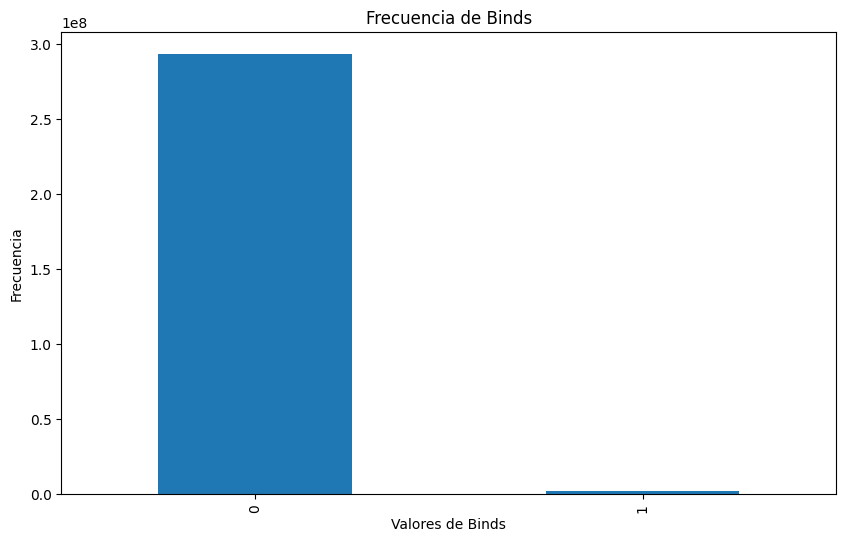

In [5]:
plt.figure(figsize=(10, 6))
frecuencia_binds.plot(kind='bar')

# Añadir títulos y etiquetas
plt.title('Frecuencia de Binds')
plt.xlabel('Valores de Binds')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

Donde podemos notar con claridad la gran diferencia en la proporción de los valores.
Un conjunto de datos tan desbalanceado puede sesgar los resultados de los modelos de clasificación, haciéndolos más propensos a predecir la clase mayoritaria (en este caso, binds = 0) y subestimando los casos donde binds = 1.

In [18]:
medicinas['binds'].value_counts(normalize= True)

binds
0    0.994615
1    0.005385
Name: proportion, dtype: float64

La información muestra que la columna 'binds' está altamente desbalanceada, tenemos 293656924 observaciones (99,4%) de moleculas que no se unieron a la proteina y solo 1589906 (0,5%) si se unieron.

**Análisis de la variable proteina y su relación con binds**

En este análisis, hemos agrupado los datos por la variable proteina para verificar cuántos valores existen por cada clase de proteina, y además identificar la frecuencia y proporción de la variable binds (0 y 1) para cada clase.

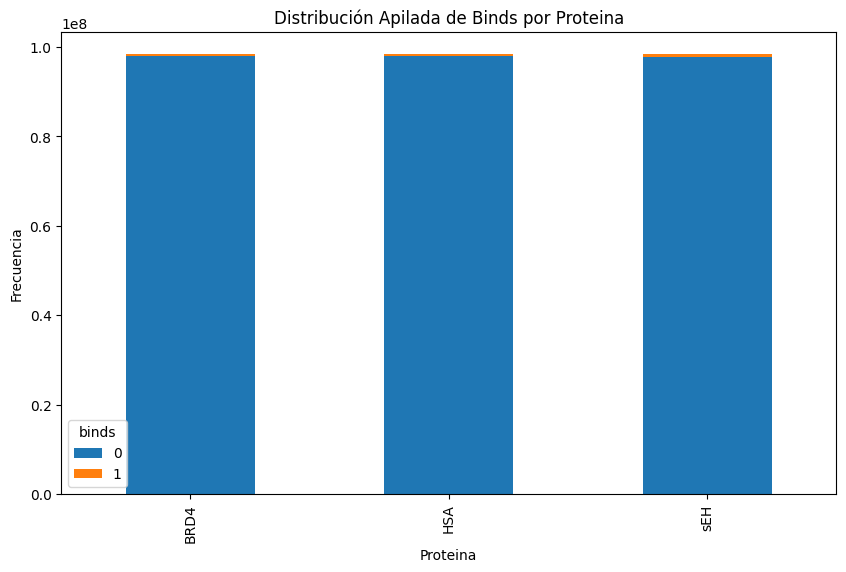

In [10]:
cross_tab = pd.crosstab(medicinas['protein_name'], medicinas['binds'])
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Distribución Apilada de Binds por Proteina')
plt.xlabel('Proteina')
plt.ylabel('Frecuencia')
plt.show()

os gráficos de barras apiladas muestran que, en cada tipo de proteína, la mayoría de las observaciones pertenecen a la clase 0 (indicando que las moléculas no se unieron), mientras que las observaciones de la clase 1 (indicando que sí se unieron) son mínimas. Esto sugiere un desbalance en los datos, con una predominancia de instancias donde no se produce la unión.

## Datos Faltantes

Comprobamos si hay datos faltantes tanto en el Dataframe de entrenamiento como enn el de test.

In [6]:
train_NA = medicinas.isna().sum()
test_NA = med_test.isna().sum()
pd.concat([train_NA, test_NA], axis=1, sort = False, keys = ['Train NA', 'Test NA'])

,Train NA,Test NA
id,0,0.0
buildingblock1_smiles,0,0.0
buildingblock2_smiles,0,0.0
buildingblock3_smiles,0,0.0
molecule_smiles,0,0.0
protein_name,0,0.0
binds,0,NaN


Los Dataframe no tienen valores faltantes, los NaN en la variable 'binds' es debido a la ausencia de esta información en el conjunto de datos de prueba (Test).

# Modificacion del dataset

Se ha decidido eliminar dos columnas del conjunto de datos: id y molecule_smiles. La columna id se ha excluido porque actúa únicamente como identificador único de las observaciones, sin aportar información relevante para el análisis. De manera similar, la columna molecule_smiles contiene nombres de moléculas que, aunque únicos, se repiten tres veces debido a la presencia de los tres tipos diferentes de proteínas en el conjunto de datos. Dado que estos valores se utilizan solo para la identificación y no influyen en el análisis predictivo, se considera innecesario mantenerlos. Además, la eliminación de estas columnas contribuye a reducir el tamaño del conjunto de datos, lo que optimiza el rendimiento del procesamiento y la velocidad de los modelos aligerando significativamente la base de datos y acelerando los procesos subsiguientes.

In [ ]:
medicinas = medicinas.drop(columns =['id', 'molecule_smiles'])

In [11]:
med_test = med_test.drop(columns =['id', 'molecule_smiles'])

## Division de la base de datos

El DataFrame de entrenamiento cuenta con 295246830 filas y 5 columnas, de las cuales 5 son categóricas con 2 numéricas (la variable objetivo) y el id. Como sabemos el tamaño del dataset sigue siendo considerablemente grande, lo que relentiza los procesos analíticos. Por ello, se propone dividir el conjunto de datos en tres DataFrames separados, basados en las proteínas involucradas: uno para la proteína sEH, otro para HSA, y el tercero para BRD4. 

In [7]:
medicinas_proteina1 = medicinas[medicinas['protein_name'] == 'sEH']

In [7]:
display(medicinas_proteina1.head())

,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,protein_name,binds
2,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.Br.NCC1CCCN1c1cccnn1,sEH,0
5,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.NCc1cccc(Br)n1,sEH,0
8,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,C#CCOc1ccc(CN)cc1.Cl,sEH,0
11,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,C=C(C)C(=O)NCCN.Cl,sEH,0
14,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,C=CCNC(=O)CN.Cl,sEH,0


In [11]:
test_proteina1 = med_test[med_test['protein_name']== 'sEH']
display(test_proteina1.head())

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name
2,295246832,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,C=Cc1ccc(N)cc1,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,sEH
5,295246835,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC(O)Cn1cnc2c(N)ncnc21,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ncnc3c2...,sEH
8,295246838,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC1(C)CCCC1(O)CN,C#CCCC[C@H](Nc1nc(NCC2(O)CCCC2(C)C)nc(Nc2ccc(C...,sEH
11,295246841,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,COC(=O)c1cc(Cl)sc1N,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2sc(Cl)c...,sEH
14,295246844,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CSC1CCC(CN)CC1,C#CCCC[C@H](Nc1nc(NCC2CCC(SC)CC2)nc(Nc2ccc(C=C...,sEH


In [10]:
test_proteina1.shape

(558142, 4)

In [11]:
medicinas_proteina2 = medicinas[medicinas['protein_name'] == 'HSA']
display(medicinas_proteina2.head())

,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,protein_name,binds
1,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.Br.NCC1CCCN1c1cccnn1,HSA,0
4,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.NCc1cccc(Br)n1,HSA,0
7,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,C#CCOc1ccc(CN)cc1.Cl,HSA,0
10,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,C=C(C)C(=O)NCCN.Cl,HSA,0
13,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,C=CCNC(=O)CN.Cl,HSA,0


In [31]:
test_proteina2 = med_test[med_test['protein_name']== 'HSA']
display(test_proteina2.head())

,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,protein_name
1,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,C=Cc1ccc(N)cc1,HSA
4,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC(O)Cn1cnc2c(N)ncnc21,HSA
7,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC1(C)CCCC1(O)CN,HSA
10,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,COC(=O)c1cc(Cl)sc1N,HSA
13,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CSC1CCC(CN)CC1,HSA


In [15]:
test_proteina2.shape

(557895, 4)

In [17]:
medicinas_proteina3 = medicinas[medicinas['protein_name'] == 'BRD4']
display(medicinas_proteina3.head())

,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,protein_name,binds
0,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.Br.NCC1CCCN1c1cccnn1,BRD4,0
3,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.NCc1cccc(Br)n1,BRD4,0
6,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,C#CCOc1ccc(CN)cc1.Cl,BRD4,0
9,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,C=C(C)C(=O)NCCN.Cl,BRD4,0
12,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,C=CCNC(=O)CN.Cl,BRD4,0


In [12]:
test_proteina3 = med_test[med_test['protein_name']== 'BRD4']
display(test_proteina3.head())

,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,protein_name
0,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,C=Cc1ccc(N)cc1,BRD4
3,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC(O)Cn1cnc2c(N)ncnc21,BRD4
6,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC1(C)CCCC1(O)CN,BRD4
9,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,COC(=O)c1cc(Cl)sc1N,BRD4
12,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CSC1CCC(CN)CC1,BRD4


In [18]:
test_proteina3.shape

(558859, 4)

Nos quedo un tres dataset uno para cada proteina tanto el de entramiento como el de prueba, test_proteina1(test) cada uno con filas 558142 y 4 columnas, y el de medicinas_proteina1(train) con 98415610 filas y 5 columnas.

## Extración de datos

A continuacion se va a utilizar una porción de los datos en lugar de todo el dataset completo. En primer lugar, al reducir el número de observaciones, se disminuye la carga computacional, lo que acelera significativamente los tiempos de procesamiento y análisis. Además, el manejo de un dataset más pequeño permite optimizar recursos de hardware y evitando posibles problemas de memoria. 
Teniendo en cuenta que se manera la misma proporción en la variable objetivo


### Proteina sEH

In [11]:
med_final1 ,_= train_test_split(medicinas_proteina1, train_size =100000, stratify = medicinas_proteina1['binds'], random_state = 11)

In [13]:
med_final1.to_csv('dataseh',index = False)

In [3]:
med_final1=pd.read_csv("C:\\Users\\KELLY\\Documents\\parcial1_ml\\dataseh")


Aquí extraemos un millón de observaciones del dataset original para construir el nuevo DataFrame de entrenamiento. Esta estrategia permite reducir significativamente el tamaño del conjunto de datos.

In [15]:
med_final1['binds'].value_counts(normalize= True)

binds
0    0.992638
1    0.007362
Name: proportion, dtype: float64

Se verifica que en el nuevo DataFrame de entrenamiento, con un millón de observaciones, se mantiene la misma proporción de moléculas que se unieron o no, tal como en el DataFrame original.

### Proteina HSA

In [12]:
med_final2 ,_= train_test_split(medicinas_proteina2, train_size =100000, stratify = medicinas_proteina2['binds'], random_state = 11)

In [13]:
med_final2.to_csv('datahsa',index = False)

In [4]:
med_final2=pd.read_csv("C:\\Users\\KELLY\\Documents\\parcial1_ml\\datahsa")

In [15]:
med_final2.shape

(100000, 5)

In [13]:
med_final2['binds'].value_counts(normalize= True)

binds
0    0.99585
1    0.00415
Name: proportion, dtype: float64

A pesar de haber extraído una porción del conjunto de datos original para el entrenamiento, hemos mantenido la proporción de la distribución de la variable objetivo. En la muestra, el 99.5% de las instancias pertenecen a la clase 0 (indicando que las moléculas no se unieron), mientras que el 0.4% pertenecen a la clase 1 (indicando que sí se unieron). Esta distribución es muy similar a la del conjunto de datos original, lo que asegura que la muestra sigue representando adecuadamente el desbalance de clases presente en el conjunto de datos completo.

### Proteina BRD4

In [18]:
med_final3 ,_= train_test_split(medicinas_proteina3, train_size =100000, stratify = medicinas_proteina3['binds'], random_state = 11)

In [20]:
med_final3.to_csv('databrd4',index = False)

In [3]:
med_final3=pd.read_csv("C:\\Users\\KELLY\\Documents\\parcial1_ml\\databrd4")

In [22]:
med_final3.shape

(100000, 5)

In [4]:
med_final3['binds'].value_counts(normalize= True)

binds
0    0.99536
1    0.00464
Name: proportion, dtype: float64

Comprobamos la porción del conjunto de datos original para el entrenamiento, hemos mantenido la distribución de la variable objetivo. En la muestra, el 99.5% de las instancias pertenecen a la clase 0 (indicando que las moléculas no se unieron), mientras que el 0.4% pertenecen a la clase 1 (indicando que sí se unieron).

## Codificar variables categoricas

### Proteina sEH

In [6]:

categorical_columns = ['protein_name','buildingblock1_smiles','buildingblock2_smiles','buildingblock3_smiles']

La lista categorical_columns define las columnas categóricas del dataset, que en este caso son: protein_name, buildingblock1_smiles, buildingblock2_smiles, y buildingblock3_smiles.

In [7]:
med_final1=med_final1.reset_index()

El comando med_final1=med_final1.reset_index() se utiliza para restablecer los índices del DataFrame med_final1.

In [8]:
encoder = OneHotEncoder(sparse_output=False, drop='first') 
one_hot_encoded = encoder.fit_transform(med_final1[categorical_columns])

El código utiliza la clase OneHotEncoder de la biblioteca sklearn para convertir las columnas categóricas del DataFrame med_final1 en variables codificadas mediante "One-Hot Encoding"

In [20]:
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([med_final1.drop(columns= categorical_columns),one_hot_df], axis=1)

In [21]:
display(df_encoded.head())

,index,binds,buildingblock1_smiles_C#CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@](C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC(CC=C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,...,buildingblock3_smiles_Nc1ncnc(=O)[nH]1,buildingblock3_smiles_Nc1ncnc(Cl)c1Cl,buildingblock3_smiles_Nc1ncnc2[nH]cnc12,buildingblock3_smiles_Nc1ncnc2[nH]ncc12,buildingblock3_smiles_Nc1ncnc2c1ncn2C1CCCCO1,buildingblock3_smiles_Nc1ncncc1Br,buildingblock3_smiles_Nc1nnc(S)s1,buildingblock3_smiles_Nc1nncs1,buildingblock3_smiles_Nc1nnn[nH]1,buildingblock3_smiles_Nc1noc2ccc(F)cc12
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Nos encontramos que el nuevo dataframe con las variables categoricas codificadas y solo se encuentran datos de 1 y 0.

Ahora se realiza el mismo proceso con el test

In [12]:
test_proteina1=test_proteina1.reset_index()

In [13]:
encodert = OneHotEncoder(sparse_output=False, drop='first') 
one_hot_encodedt = encodert.fit_transform(test_proteina1[categorical_columns])

In [17]:
one_hot_dft = pd.DataFrame(one_hot_encodedt, columns=encodert.get_feature_names_out(categorical_columns))
df_encodedt = pd.concat([test_proteina1.drop(columns= categorical_columns),one_hot_dft], axis=1)


Como resultado, obtenemos el conjunto de datos de prueba completamente codificado.

In [18]:
display(df_encodedt.head())

,index,id,molecule_smiles,buildingblock1_smiles_C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@](C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC(CC=C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,...,buildingblock3_smiles_O=C(O)c1nccc(N2CCOCC2)n1,buildingblock3_smiles_O=C(O)c1nccnc1N1CCCCC1,buildingblock3_smiles_O=C(O)c1ncn(-c2ccccc2)n1,buildingblock3_smiles_O=C(O)c1ncsc1C(F)(F)F,buildingblock3_smiles_O=C(O)c1scc2c1CCCC2,buildingblock3_smiles_O=C1CC(C(=O)O)c2cccnc2N1,buildingblock3_smiles_O=C1CC2(C1)CC(C(=O)O)C2,buildingblock3_smiles_O=C1CCC(C(=O)O)CC1,buildingblock3_smiles_O=C1NC(=O)C2(CCC(C(=O)O)CC2)N1,buildingblock3_smiles_O=C1NCC(Cn2cc(C(=O)O)nn2)O1
0,2,295246832,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,295246835,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ncnc3c2...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,295246838,C#CCCC[C@H](Nc1nc(NCC2(O)CCCC2(C)C)nc(Nc2ccc(C...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,295246841,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2sc(Cl)c...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14,295246844,C#CCCC[C@H](Nc1nc(NCC2CCC(SC)CC2)nc(Nc2ccc(C=C...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Proteina HSA

Se realiza el mismo proceso que en el anterior dataframe de la proteina sED pero ahora con la Proteina HSA

In [5]:
categorical_columns = ['protein_name','buildingblock1_smiles','buildingblock2_smiles','buildingblock3_smiles']

La lista categorical_columns se utilizaran en los tres dataset: protein_name, buildingblock1_smiles, buildingblock2_smiles, y buildingblock3_smiles.

In [6]:
med_final2=med_final2.reset_index()

Al ejecutar esta función, se genera un nuevo índice secuencial para cada fila, mientras que el índice original, si existe, se convierte en una columna del DataFrame.

In [7]:
encoder2 = OneHotEncoder(sparse_output=False, drop='first') 
one_hot_encoded2 = encoder2.fit_transform(med_final2[categorical_columns])

In [8]:
one_hot_df2 = pd.DataFrame(one_hot_encoded2, columns=encoder2.get_feature_names_out(categorical_columns))
df_encoded2 = pd.concat([med_final2.drop(columns= categorical_columns),one_hot_df2], axis=1)

In [9]:
display(df_encoded2.head())

,index,binds,buildingblock1_smiles_C#CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@](C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC(CC=C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,...,buildingblock3_smiles_Nc1ncnc(=O)[nH]1,buildingblock3_smiles_Nc1ncnc(Cl)c1Cl,buildingblock3_smiles_Nc1ncnc2[nH]cnc12,buildingblock3_smiles_Nc1ncnc2[nH]ncc12,buildingblock3_smiles_Nc1ncnc2c1ncn2C1CCCCO1,buildingblock3_smiles_Nc1ncncc1Br,buildingblock3_smiles_Nc1nnc(S)s1,buildingblock3_smiles_Nc1nncs1,buildingblock3_smiles_Nc1nnn[nH]1,buildingblock3_smiles_Nc1noc2ccc(F)cc12
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


El nuevo dataframe con las variables categoricas codificadas y solo se encuentran datos de 1 y 0.

Se realiza lo mismo con el test

In [ ]:
test_proteina2=test_proteina2.reset_index()

In [33]:
encodert2 = OneHotEncoder(sparse_output=False, drop='first') 
one_hot_encodedt2 = encodert2.fit_transform(test_proteina2[categorical_columns])

In [ ]:
one_hot_dft2 = pd.DataFrame(one_hot_encodedt2, columns=encodert2.get_feature_names_out(categorical_columns))
df_encodedt2 = pd.concat([test_proteina2.drop(columns= categorical_columns),one_hot_dft2], axis=1)

In [35]:
display(df_encodedt2.head())

,index,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,protein_name,buildingblock1_smiles_C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@](C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,...,buildingblock3_smiles_O=C(O)c1nccc(N2CCOCC2)n1,buildingblock3_smiles_O=C(O)c1nccnc1N1CCCCC1,buildingblock3_smiles_O=C(O)c1ncn(-c2ccccc2)n1,buildingblock3_smiles_O=C(O)c1ncsc1C(F)(F)F,buildingblock3_smiles_O=C(O)c1scc2c1CCCC2,buildingblock3_smiles_O=C1CC(C(=O)O)c2cccnc2N1,buildingblock3_smiles_O=C1CC2(C1)CC(C(=O)O)C2,buildingblock3_smiles_O=C1CCC(C(=O)O)CC1,buildingblock3_smiles_O=C1NC(=O)C2(CCC(C(=O)O)CC2)N1,buildingblock3_smiles_O=C1NCC(Cn2cc(C(=O)O)nn2)O1
0,1,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,C=Cc1ccc(N)cc1,HSA,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC(O)Cn1cnc2c(N)ncnc21,HSA,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC1(C)CCCC1(O)CN,HSA,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,COC(=O)c1cc(Cl)sc1N,HSA,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CSC1CCC(CN)CC1,HSA,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Proteina BRD4

Por ultimo codificamos la Proteina BRD4 con el mismo proceso que en los anteriores Dataframes.

In [5]:
categorical_columns = ['protein_name','buildingblock1_smiles','buildingblock2_smiles','buildingblock3_smiles']

In [6]:
med_final3=med_final3.reset_index()

In [7]:
encoder3 = OneHotEncoder(sparse_output=False, drop='first') 
one_hot_encoded3 = encoder3.fit_transform(med_final3[categorical_columns])

In [8]:
one_hot_df3 = pd.DataFrame(one_hot_encoded3, columns=encoder3.get_feature_names_out(categorical_columns))
df_encoded3 = pd.concat([med_final3.drop(columns= categorical_columns),one_hot_df3], axis=1)

In [28]:
display(df_encoded3.head())

,index,binds,buildingblock1_smiles_C#CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@](C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC(CC=C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,...,buildingblock3_smiles_Nc1ncnc(=O)[nH]1,buildingblock3_smiles_Nc1ncnc(Cl)c1Cl,buildingblock3_smiles_Nc1ncnc2[nH]cnc12,buildingblock3_smiles_Nc1ncnc2[nH]ncc12,buildingblock3_smiles_Nc1ncnc2c1ncn2C1CCCCO1,buildingblock3_smiles_Nc1ncncc1Br,buildingblock3_smiles_Nc1nnc(S)s1,buildingblock3_smiles_Nc1nncs1,buildingblock3_smiles_Nc1nnn[nH]1,buildingblock3_smiles_Nc1noc2ccc(F)cc12
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Codificación del test

In [13]:
test_proteina3=test_proteina3.reset_index()

In [14]:
encodert3 = OneHotEncoder(sparse_output=False, drop='first') 
one_hot_encodedt3 = encodert3.fit_transform(test_proteina3[categorical_columns])

In [15]:
one_hot_dft3 = pd.DataFrame(one_hot_encodedt3, columns=encodert3.get_feature_names_out(categorical_columns))
df_encodedt3 = pd.concat([test_proteina3.drop(columns= categorical_columns),one_hot_dft3], axis=1)

In [27]:
display(df_encodedt3.head())

,index,buildingblock1_smiles_C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@](C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC(CC=C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,...,buildingblock3_smiles_O=C(O)c1nccc(N2CCOCC2)n1,buildingblock3_smiles_O=C(O)c1nccnc1N1CCCCC1,buildingblock3_smiles_O=C(O)c1ncn(-c2ccccc2)n1,buildingblock3_smiles_O=C(O)c1ncsc1C(F)(F)F,buildingblock3_smiles_O=C(O)c1scc2c1CCCC2,buildingblock3_smiles_O=C1CC(C(=O)O)c2cccnc2N1,buildingblock3_smiles_O=C1CC2(C1)CC(C(=O)O)C2,buildingblock3_smiles_O=C1CCC(C(=O)O)CC1,buildingblock3_smiles_O=C1NC(=O)C2(CCC(C(=O)O)CC2)N1,buildingblock3_smiles_O=C1NCC(Cn2cc(C(=O)O)nn2)O1
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Prueba de Chi-Cuadrado para Multicolinealidad (entre Variables Categóricas)

Se va a identificar si hay dependencia significativa entre las variables categóricas.

In [17]:
y = df_encoded['binds'] 

k_best = SelectKBest(score_func= chi2, k=100)  
X_new = k_best.fit_transform(df_encoded, y)

selected_features = k_best.get_support(indices=True)
one_hot_df_reduced = one_hot_df.iloc[:, selected_features]
selected_names = df_encoded.columns[selected_features]

El código aplica la técnica de selección de características SelectKBest con la estadística chi-cuadrado (chi2) para identificar las 100 variables más relevantes del conjunto de datos codificado. Primero se define la variable objetivo y (la columna binds), y luego se ajusta SelectKBest para evaluar la dependencia entre las características categóricas codificadas y la variable objetivo. Posteriormente, se seleccionan los índices de las mejores características y se extraen del DataFrame original.

In [21]:
one_hot_df_reduced.head()

,buildingblock1_smiles_C#CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@](C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_O=C(NC1(C(=O)O)CCC1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(NCc1cccc(C(=O)O)c1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(N[C@@H](C(=O)O)C1CCCC1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(N[C@@H](Cc1cccs1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(N[C@H](Cc1ccc([N+](=O)[O-])cc1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1ccc(C(=O)O)cc1Cl)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1ccc(C(=O)O)cn1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1ccc(Cl)c(C(=O)O)c1)OCC1c2ccccc2-c2ccccc21,...,buildingblock3_smiles_Nc1cc(-c2cccc(Br)c2)no1,buildingblock3_smiles_Nc1cc(C2CC2)[nH]n1,buildingblock3_smiles_Nc1cc(Cl)cnc1Cl,buildingblock3_smiles_Nc1cc(F)cc(F)c1[N+](=O)[O-],buildingblock3_smiles_Nc1ccc2c(c1)OCCCO2,buildingblock3_smiles_Nc1cccnc1Cl,buildingblock3_smiles_Nc1cncnc1,buildingblock3_smiles_Nc1nc(-c2ccc(Cl)c(Cl)c2)cs1,buildingblock3_smiles_Nc1nc2c(Br)cccc2s1,buildingblock3_smiles_Nc1ncnc(=O)[nH]1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modelos de clasificación

## Proteina sEH

In [22]:


X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('binds',axis=1), df_encoded['binds'], test_size=0.30, random_state=101)


knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('knn', KNeighborsClassifier())  
])


logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('logreg', LogisticRegression(solver='liblinear'))
])


knn_params = {
    'knn__n_neighbors': [3, 5, 7, 9, 11] 
}

logreg_params = {
    'logreg__C': [0.1, 1, 10]  
}


knn_grid = GridSearchCV(knn_pipeline, param_grid=knn_params, cv=5, scoring='roc_auc')
logreg_grid = GridSearchCV(logreg_pipeline, param_grid=logreg_params, cv=5, scoring='roc_auc')


knn_grid.fit(X_train, y_train)
logreg_grid.fit(X_train, y_train)


print("Mejor número de vecinos KNN:", knn_grid.best_params_['knn__n_neighbors'])
print("Mejor valor de C para Regresión Logística:", logreg_grid.best_params_['logreg__C'])



y_pred_knn = knn_grid.best_estimator_.predict(X_test)
y_pred_logreg = logreg_grid.best_estimator_.predict(X_test)
y_prob_knn = knn_grid.best_estimator_.predict_proba(X_test)[:, 1]
y_prob_logreg = logreg_grid.best_estimator_.predict_proba(X_test)[:, 1]

Mejor número de vecinos KNN: 11
Mejor valor de C para Regresión Logística: 0.1


E mejor desempeño para el modelo K-NN se logra con 11 vecinos, lo que optimiza la capacidad del modelo para clasificar las instancias. Para la Regresión Logística, el mejor rendimiento se obtiene con un valor de C = 0.1, lo que controla la regularización del modelo y mejora su capacidad para generalizar. Estos ajustes son cruciales para maximizar la precisión y el rendimiento general de los modelos en la clasificación de datos.

In [32]:

print("KNN - Matriz de confusión:\n", confusion_matrix(y_test, y_pred_knn))
print("Regresión Logística - Matriz de confusión:\n", confusion_matrix(y_test, y_pred_logreg))
print("KNN - Reporte de clasificación:\n", classification_report(y_test, y_pred_knn))
auc_knn = roc_auc_score(y_test, y_prob_knn)


print("Regresión Logística - Reporte de clasificación:\n", classification_report(y_test, y_pred_logreg))
auc_logreg = roc_auc_score(y_test, y_prob_logreg)



if auc_knn > auc_logreg:
    print("El mejor modelo es KNN con AUC:", auc_knn)
else:
    print("El mejor modelo es Regresión Logística con AUC:", auc_logreg)


KNN - Matriz de confusión:
 [[29783     0]
 [  217     0]]
Regresión Logística - Matriz de confusión:
 [[29708    75]
 [  119    98]]
KNN - Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     29783
           1       0.00      0.00      0.00       217

    accuracy                           0.99     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.99      0.99      0.99     30000

Regresión Logística - Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29783
           1       0.57      0.45      0.50       217

    accuracy                           0.99     30000
   macro avg       0.78      0.72      0.75     30000
weighted avg       0.99      0.99      0.99     30000

El mejor modelo es Regresión Logística con AUC: 0.9605086624278131


c:\Users\KELLY\miniconda3\envs\ml_venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KELLY\miniconda3\envs\ml_venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KELLY\miniconda3\envs\ml_venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


El análisis muestra que la Regresión Logística supera al modelo KNN en términos de desempeño. La matriz de confusión y el reporte de clasificación para KNN revelan que el modelo no identifica correctamente las instancias de la clase positiva (1), resultando en una precisión nula para esta clase y una AUC baja de 0.646. En contraste, la Regresión Logística clasifica correctamente tanto la clase negativa (0) como la positiva (1), con una precisión y recall más equilibrados, y un notable AUC de 0.961. Esto indica que la Regresión Logística tiene una mejor capacidad para distinguir entre las clases y es, por lo tanto, el modelo más efectivo en este caso.

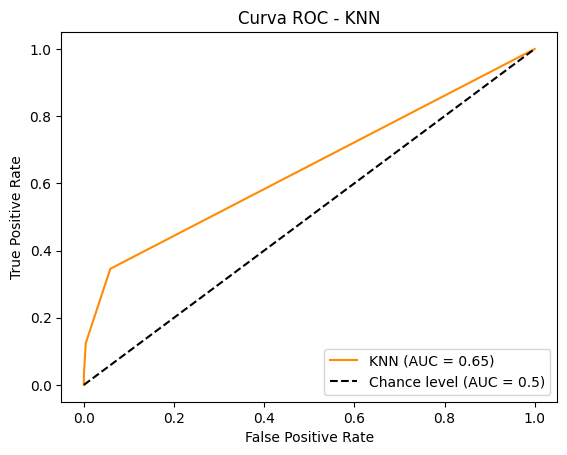

In [28]:
display_knn = RocCurveDisplay.from_predictions(
    y_test, y_prob_knn,
    name="KNN",
    color="darkorange",
    plot_chance_level=True
)
_ = display_knn.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Curva ROC - KNN"
)


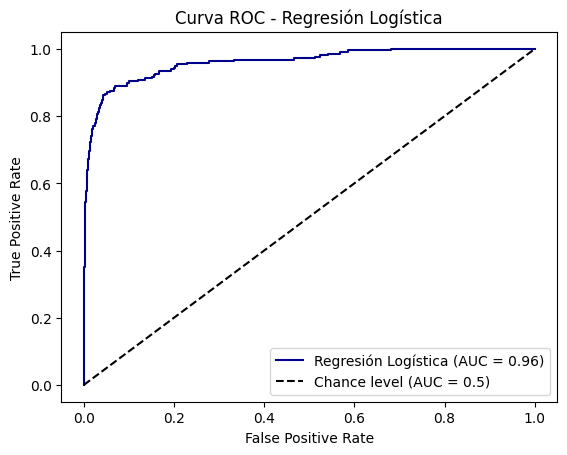

In [29]:
display_logreg = RocCurveDisplay.from_predictions(
    y_test, y_prob_logreg,
    name="Regresión Logística",
    color="darkblue",
    plot_chance_level=True
)
_ = display_logreg.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Curva ROC - Regresión Logística"
)

las curvas ROC confirmarán que la Regresión Logística no solo es más efectiva en términos de AUC, sino también en su capacidad general para clasificar correctamente las instancias en comparación con KNN. La Regresión Logística debería mostrar una curva más cercana a la esquina superior izquierda del gráfico ROC, indicando mejor desempeño en la clasificación.

In [27]:
table = pd.DataFrame({
    'Modelo': ['K-NN', 'Regresión Logística'],
    'Precisión': [precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_logreg)],
    'Recall': [recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_logreg)],
    'F1-Score': [f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_logreg)],
    'AUC': [auc_knn, auc_logreg]
})

print("\nTabla de error:")
print(table)


Tabla de error:
                Modelo  Precisión    Recall  F1-Score       AUC
0                 K-NN   0.000000  0.000000  0.000000  0.646390
1  Regresión Logística   0.566474  0.451613  0.502564  0.960509


c:\Users\KELLY\miniconda3\envs\ml_venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-K-NN presenta una precisión, recall y F1-Score de 0.000000 para la clase positiva, reflejando un desempeño deficiente en la identificación de esta clase. Su AUC de 0.646390 sugiere una capacidad limitada para discriminar entre las clases.
-Regresión Logística muestra una precisión de 0.566474, un recall de 0.451613 y un F1-Score de 0.502564, indicando una mejor capacidad para clasificar las instancias de la clase positiva. Además, su AUC de 0.960509 destaca una excelente habilidad para distinguir entre las clases, confirmando su superioridad sobre el modelo K-NN en términos de desempeño general.

## Proteina HSA

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded2.drop('binds',axis=1), df_encoded2['binds'], test_size=0.30, random_state=101)

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('knn', KNeighborsClassifier())  
])
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('logreg', LogisticRegression(solver='liblinear'))
])
knn_params = {
    'knn__n_neighbors': [3, 5, 7, 9, 11] 
}
logreg_params = {
    'logreg__C': [0.1, 1, 10]  
}
knn_grid = GridSearchCV(knn_pipeline, param_grid=knn_params, cv=5, scoring='roc_auc')
logreg_grid = GridSearchCV(logreg_pipeline, param_grid=logreg_params, cv=5, scoring='roc_auc')

knn_grid.fit(X_train, y_train)
logreg_grid.fit(X_train, y_train)
print("Mejor número de vecinos KNN:", knn_grid.best_params_['knn__n_neighbors'])
print("Mejor valor de C para Regresión Logística:", logreg_grid.best_params_['logreg__C'])
y_pred_knn = knn_grid.best_estimator_.predict(X_test)
y_pred_logreg = logreg_grid.best_estimator_.predict(X_test)
y_prob_knn = knn_grid.best_estimator_.predict_proba(X_test)[:, 1]
y_prob_logreg = logreg_grid.best_estimator_.predict_proba(X_test)[:, 1]

Mejor número de vecinos KNN: 11
Mejor valor de C para Regresión Logística: 0.1


In [12]:

print("KNN - Matriz de confusión:\n", confusion_matrix(y_test, y_pred_knn))
print("Regresión Logística - Matriz de confusión:\n", confusion_matrix(y_test, y_pred_logreg))
print("KNN - Reporte de clasificación:\n", classification_report(y_test, y_pred_knn))
auc_knn = roc_auc_score(y_test, y_prob_knn)


print("Regresión Logística - Reporte de clasificación:\n", classification_report(y_test, y_pred_logreg))
auc_logreg = roc_auc_score(y_test, y_prob_logreg)



if auc_knn > auc_logreg:
    print("El mejor modelo es KNN con AUC:", auc_knn)
else:
    print("El mejor modelo es Regresión Logística con AUC:", auc_logreg)

KNN - Matriz de confusión:
 [[29879     0]
 [  121     0]]
Regresión Logística - Matriz de confusión:
 [[29861    18]
 [  113     8]]
KNN - Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29879
           1       0.00      0.00      0.00       121

    accuracy                           1.00     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.99      1.00      0.99     30000

Regresión Logística - Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29879
           1       0.31      0.07      0.11       121

    accuracy                           1.00     30000
   macro avg       0.65      0.53      0.55     30000
weighted avg       0.99      1.00      0.99     30000

El mejor modelo es Regresión Logística con AUC: 0.9041848956078774


c:\Users\KELLY\miniconda3\envs\ml_venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KELLY\miniconda3\envs\ml_venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KELLY\miniconda3\envs\ml_venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Para KNN, la matriz de confusión muestra que predice todas las instancias de la clase mayoritaria (0) correctamente, pero no logra predecir ningún caso de la clase minoritaria (1). Esto se refleja en el reporte de clasificación, donde la precisión, recall y f1-score para la clase 1 son todos 0, lo que sugiere que KNN no es efectivo en distinguir las observaciones de la clase minoritaria. El modelo tiene un alto nivel de precisión general, pero esto se debe a la predominancia de la clase 0.

Por otro lado, la Regresión Logística logra identificar algunos casos de la clase 1, aunque de manera limitada, con una precisión de 31% para la clase 1 y un recall del 7%. A pesar de que es mejor que KNN en reconocer la clase minoritaria, el desempeño sigue siendo bajo. La precisión general sigue siendo alta debido a la predominancia de la clase 0.

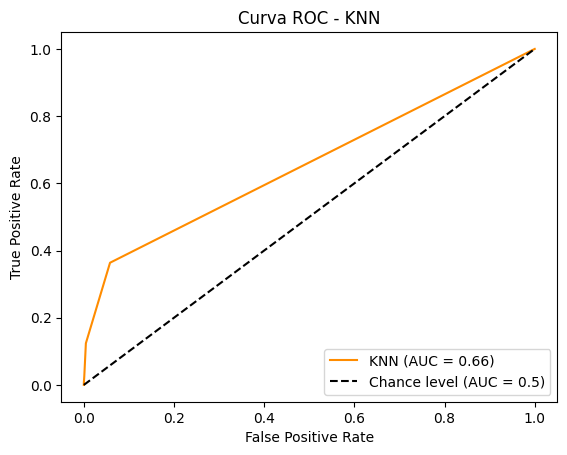

In [13]:
display_knn = RocCurveDisplay.from_predictions(
    y_test, y_prob_knn,
    name="KNN",
    color="darkorange",
    plot_chance_level=True
)
_ = display_knn.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Curva ROC - KNN"
)

Dado que KNN no logró predecir correctamente ninguna instancia de la clase minoritaria (1) en la matriz de confusión, a curva ROC de KNN esté cerca de la línea diagonal (una línea con un AUC cercano a 0.5). Esto indica que KNN no tiene una capacidad significativa para discriminar entre las clases, especialmente debido al desbalance extremo de la variable objetivo.


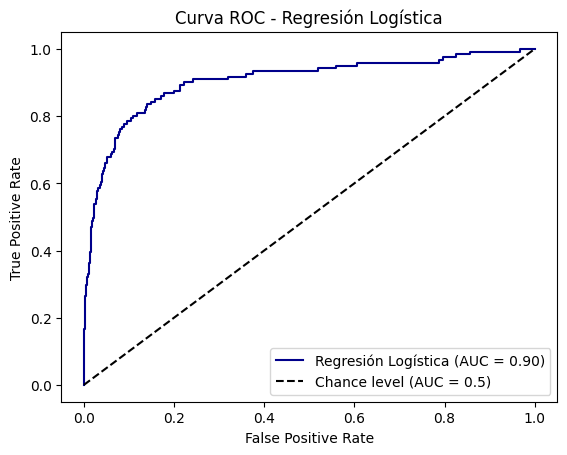

In [14]:
display_logreg = RocCurveDisplay.from_predictions(
    y_test, y_prob_logreg,
    name="Regresión Logística",
    color="darkblue",
    plot_chance_level=True
)
_ = display_logreg.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Curva ROC - Regresión Logística"
)

Aunque la Regresión Logística tiene un mejor rendimiento que KNN al identificar algunos casos de la clase minoritaria (1).En comparación con KNN, su curva ROC está mejor situada, más arriba en la gráfica, lo que indica una mejor capacidad de discriminación entre las clases. El AUC de la Regresión Logística es mayor que el de KNN, ya que este modelo muestra más capacidad para diferenciar entre clases, como lo reflejan sus valores de precisión y recall.

In [15]:
table = pd.DataFrame({
    'Modelo': ['K-NN', 'Regresión Logística'],
    'Precisión': [precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_logreg)],
    'Recall': [recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_logreg)],
    'F1-Score': [f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_logreg)],
    'AUC': [auc_knn, auc_logreg]
})

print("\nTabla de error:")
print(table)


Tabla de error:
                Modelo  Precisión    Recall  F1-Score       AUC
0                 K-NN   0.000000  0.000000  0.000000  0.655523
1  Regresión Logística   0.307692  0.066116  0.108844  0.904185


c:\Users\KELLY\miniconda3\envs\ml_venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


El modelo de K-NN tiene una precisión, recall y F1-Score de 0, lo que indica que no está capturando correctamente las observaciones de la clase minoritaria (clase 1). Sin embargo, su AUC es de 0.655523, lo que sugiere que tiene alguna capacidad para distinguir entre clases, aunque no es eficaz.

La regresion logistica tiene mejor rendimiento en términos de precisión (30.77%), recall (6.61%) y F1-Score (10.88%), el modelo aún tiene dificultades para identificar correctamente la clase 1. No obstante, el AUC de 0.904185 indica que la Regresión Logística tiene un desempeño significativamente mejor que K-NN en la diferenciación entre las clases.

## Proteina BRD4

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded3.drop('binds',axis=1), df_encoded3['binds'], test_size=0.30, random_state=101)

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('knn', KNeighborsClassifier())  
])
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('logreg', LogisticRegression(solver='liblinear'))
])
knn_params = {
    'knn__n_neighbors': [3, 5, 7, 9, 11] 
}
logreg_params = {
    'logreg__C': [0.1, 1, 10]  
}
knn_grid = GridSearchCV(knn_pipeline, param_grid=knn_params, cv=5, scoring='roc_auc')
logreg_grid = GridSearchCV(logreg_pipeline, param_grid=logreg_params, cv=5, scoring='roc_auc')

knn_grid.fit(X_train, y_train)
logreg_grid.fit(X_train, y_train)
print("Mejor número de vecinos KNN:", knn_grid.best_params_['knn__n_neighbors'])
print("Mejor valor de C para Regresión Logística:", logreg_grid.best_params_['logreg__C'])
y_pred_knn = knn_grid.best_estimator_.predict(X_test)
y_pred_logreg = logreg_grid.best_estimator_.predict(X_test)
y_prob_knn = knn_grid.best_estimator_.predict_proba(X_test)[:, 1]
y_prob_logreg = logreg_grid.best_estimator_.predict_proba(X_test)[:, 1]

Mejor número de vecinos KNN: 11
Mejor valor de C para Regresión Logística: 0.1


In [18]:
print("KNN - Matriz de confusión:\n", confusion_matrix(y_test, y_pred_knn))
print("Regresión Logística - Matriz de confusión:\n", confusion_matrix(y_test, y_pred_logreg))
print("KNN - Reporte de clasificación:\n", classification_report(y_test, y_pred_knn))
auc_knn = roc_auc_score(y_test, y_prob_knn)


print("Regresión Logística - Reporte de clasificación:\n", classification_report(y_test, y_pred_logreg))
auc_logreg = roc_auc_score(y_test, y_prob_logreg)



if auc_knn > auc_logreg:
    print("El mejor modelo es KNN con AUC:", auc_knn)
else:
    print("El mejor modelo es Regresión Logística con AUC:", auc_logreg)

KNN - Matriz de confusión:
 [[29840     0]
 [  160     0]]
Regresión Logística - Matriz de confusión:
 [[29817    23]
 [  137    23]]
KNN - Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     29840
           1       0.00      0.00      0.00       160

    accuracy                           0.99     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.99      0.99      0.99     30000

Regresión Logística - Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29840
           1       0.50      0.14      0.22       160

    accuracy                           0.99     30000
   macro avg       0.75      0.57      0.61     30000
weighted avg       0.99      0.99      0.99     30000

El mejor modelo es Regresión Logística con AUC: 0.9224807305630026


c:\Users\KELLY\miniconda3\envs\ml_venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KELLY\miniconda3\envs\ml_venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KELLY\miniconda3\envs\ml_venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


En este análisis, la Regresión Logística supera claramente al modelo K-NN en la clasificación de las observaciones. Mientras que K-NN no logra identificar ningún caso de la clase minoritaria (binds = 1), Regresión Logística, aunque con un recall bajo (0.14), logra predecir correctamente algunos casos de dicha clase. Esto sugiere que Regresión Logística es más eficaz para manejar el desequilibrio de clases en los datos, siendo un modelo más adecuado para este problema, ya que puede identificar ciertos casos de la clase menos representada, algo que K-NN no consigue.

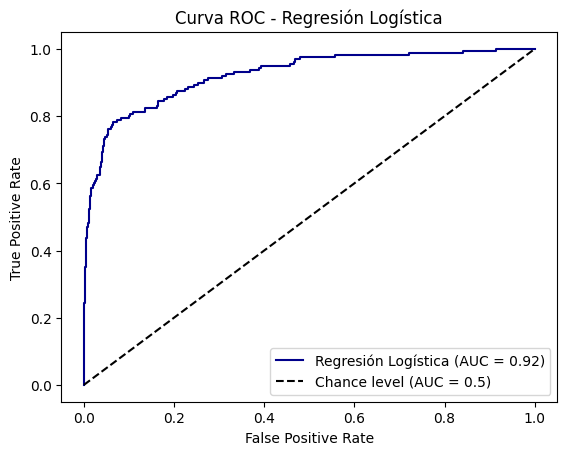

In [19]:
display_logreg = RocCurveDisplay.from_predictions(
    y_test, y_prob_logreg,
    name="Regresión Logística",
    color="darkblue",
    plot_chance_level=True
)
_ = display_logreg.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Curva ROC - Regresión Logística"
)

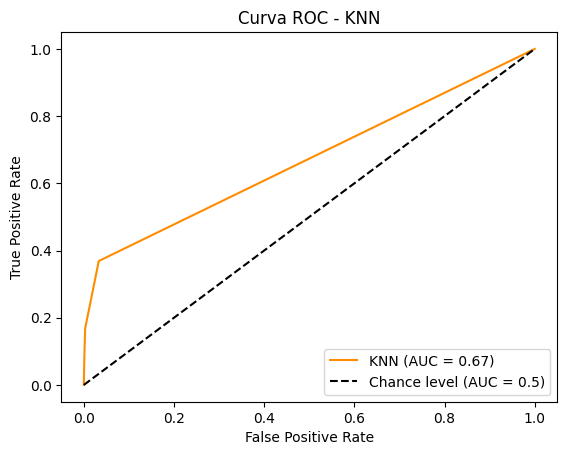

In [20]:
display_knn = RocCurveDisplay.from_predictions(
    y_test, y_prob_knn,
    name="KNN",
    color="darkorange",
    plot_chance_level=True
)
_ = display_knn.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Curva ROC - KNN"
)

Al analizar las curvas ROC para ambos modelos, K-NN y Regresión Logística, es evidente que la Regresión Logística tiene un rendimiento superior en comparación con K-NN. La curva ROC de la Regresión Logística se sitúa más cerca de la esquina superior izquierda del gráfico, lo que indica una mejor capacidad para distinguir entre las clases positivas y negativas. Esto es consistente con los resultados de las matrices de confusión y los reportes de clasificación, donde la Regresión Logística, a pesar de sus limitaciones, muestra un AUC significativamente más alto, indicando que es más efectiva en la identificación de la clase minoritaria (binds = 1) en comparación con K-NN. 

In [21]:
table = pd.DataFrame({
    'Modelo': ['K-NN', 'Regresión Logística'],
    'Precisión': [precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_logreg)],
    'Recall': [recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_logreg)],
    'F1-Score': [f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_logreg)],
    'AUC': [auc_knn, auc_logreg]
})

print("\nTabla de error:")
print(table)


Tabla de error:
                Modelo  Precisión   Recall  F1-Score       AUC
0                 K-NN        0.0  0.00000  0.000000  0.670068
1  Regresión Logística        0.5  0.14375  0.223301  0.922481


c:\Users\KELLY\miniconda3\envs\ml_venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


La Regresión Logística presenta un rendimiento notablemente mejor en términos de recall y F1-Score para la clase minoritaria (1). Esto es evidente por su mayor recall (0.14375 frente a 0.00000) y un F1-Score más alto (0.223301 frente a 0.000000). Además, la Regresión Logística tiene un AUC de 0.922481, que es considerablemente superior al AUC de 0.670068 de K-NN. 